In [7]:
import config
import pandas as pd
from IPython.display import display

import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np


In [8]:
# from  config  import * 
%run -i  mainapi.py

portolio=portafolio()
print(type(portolio))


<class 'dict'>


In [9]:
print(portolio)


{'pais': 0, 'activos': [{'cantidad': 24.0, 'comprometido': 24.0, 'puntosVariacion': 0.0, 'variacionDiaria': -1.37, 'ultimoPrecio': 68090.0, 'ppc': 68200.0, 'gananciaPorcentaje': -0.16, 'gananciaDinero': -26.4, 'valorizado': 16341.6, 'titulo': {'simbolo': 'AL30', 'descripcion': 'Bono Rep. Argentina Usd Step Up 2030', 'pais': 'argentina', 'mercado': 'bcba', 'tipo': 'TitulosPublicos', 'plazo': 't0', 'moneda': 'peso_Argentino'}, 'parking': None}, {'cantidad': 544.0, 'comprometido': 0.0, 'puntosVariacion': 0.0, 'variacionDiaria': 2.34, 'ultimoPrecio': 159.0, 'ppc': 154.2, 'gananciaPorcentaje': 3.11, 'gananciaDinero': 2611.2, 'valorizado': 86496.0, 'titulo': {'simbolo': 'COME', 'descripcion': 'Sociedad Comercial Del Plata', 'pais': 'argentina', 'mercado': 'bcba', 'tipo': 'ACCIONES', 'plazo': 't0', 'moneda': 'peso_Argentino'}, 'parking': None}, {'cantidad': 8.0, 'comprometido': 0.0, 'puntosVariacion': 0.0, 'variacionDiaria': -1.9, 'ultimoPrecio': 4646.1, 'ppc': 4511.0, 'gananciaPorcentaje': 2

In [10]:
# Datos extraídos del diccionario original
data = {
    'cantidad': [],
    'comprometido': [],
    'puntosVariacion': [],
    'variacionDiaria': [],
    'ultimoPrecio': [],
    'ppc': [],
    'gananciaPorcentaje': [],
    'gananciaDinero': [],
    'valorizado': [],
    'simbolo': [],
    'descripcion': [],
    'pais': [],
    'mercado': [],
    'tipo': [],
    'plazo': [],
    'moneda': []
}

for activo in portolio['activos']:
    data['cantidad'].append(activo['cantidad'])
    data['comprometido'].append(activo['comprometido'])
    data['puntosVariacion'].append(activo['puntosVariacion'])
    data['variacionDiaria'].append(activo['variacionDiaria'])
    data['ultimoPrecio'].append(activo['ultimoPrecio'])
    data['ppc'].append(activo['ppc'])
    data['gananciaPorcentaje'].append(activo['gananciaPorcentaje'])
    data['gananciaDinero'].append(activo['gananciaDinero'])
    data['valorizado'].append(activo['valorizado'])
    data['simbolo'].append(activo['titulo']['simbolo'])
    data['descripcion'].append(activo['titulo']['descripcion'])
    data['pais'].append(activo['titulo']['pais'])
    data['mercado'].append(activo['titulo']['mercado'])
    data['tipo'].append(activo['titulo']['tipo'])
    data['plazo'].append(activo['titulo']['plazo'])
    data['moneda'].append(activo['titulo']['moneda'])

df = pd.DataFrame(data)

# Filtrar el DataFrame para excluir filas donde 'tipo' es 'TitulosPublicos'
df_filtered = df[df['tipo'] != 'TitulosPublicos']

# Mostrar el DataFrame filtrado
df_filtered

,cantidad,comprometido,puntosVariacion,variacionDiaria,ultimoPrecio,ppc,gananciaPorcentaje,gananciaDinero,valorizado,simbolo,descripcion,pais,mercado,tipo,plazo,moneda
1,544.0,0.0,0.0,2.34,159.0,154.2,3.11,2611.2,86496.0,COME,Sociedad Comercial Del Plata,argentina,bcba,ACCIONES,t0,peso_Argentino
2,8.0,0.0,0.0,-1.90,4646.1,4511.0,2.99,1080.8,37168.8,TGSU2,Transportadora Gas Del Sur,argentina,bcba,ACCIONES,t0,peso_Argentino
3,61.0,0.0,0.0,-0.58,1625.5,1605.0,1.27,1250.5,99155.5,TRAN,Transener,argentina,bcba,ACCIONES,t0,peso_Argentino
4,5.0,0.0,0.0,-2.89,26568.5,26751.0,-0.68,-912.5,132842.5,YPFD,Ypf,argentina,bcba,ACCIONES,t0,peso_Argentino


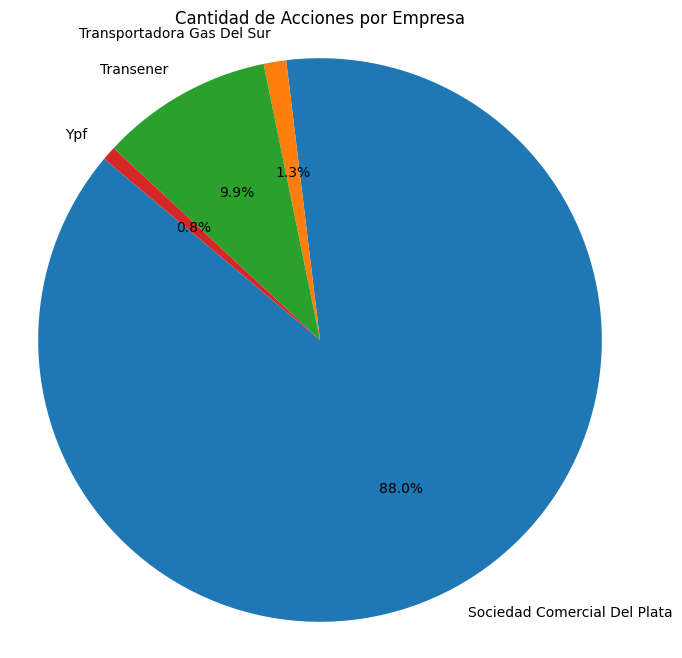

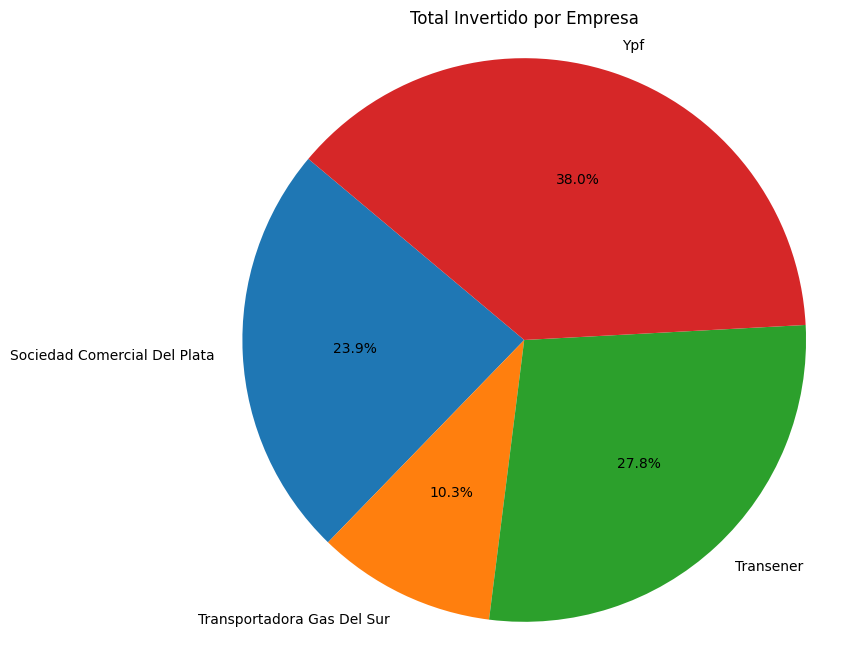

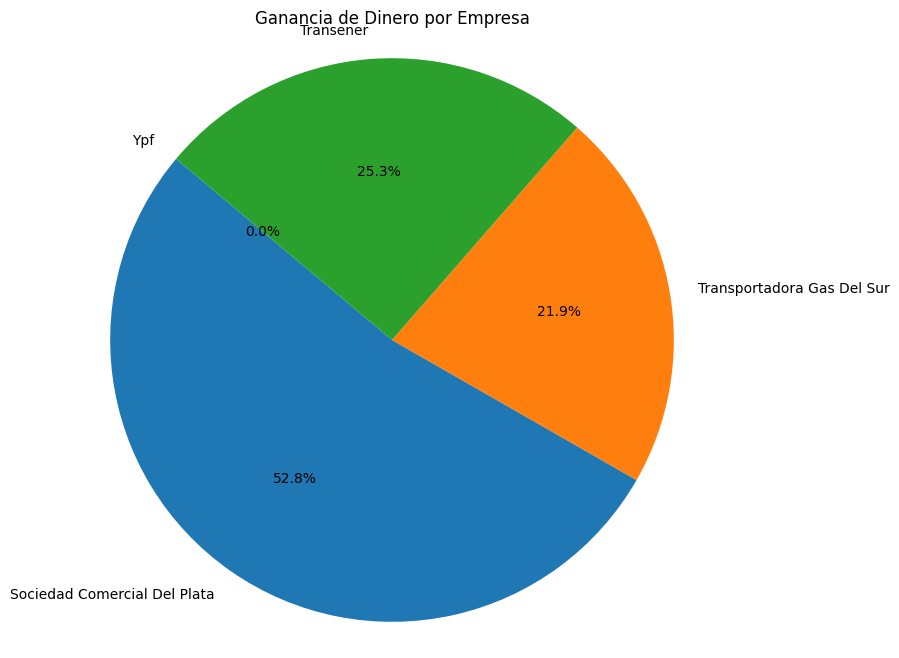

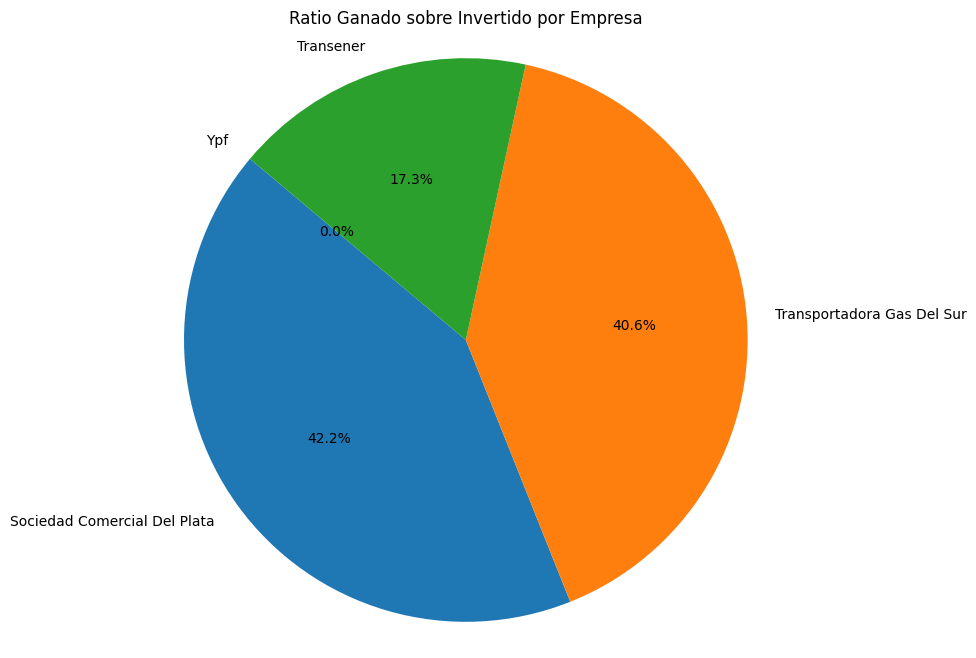

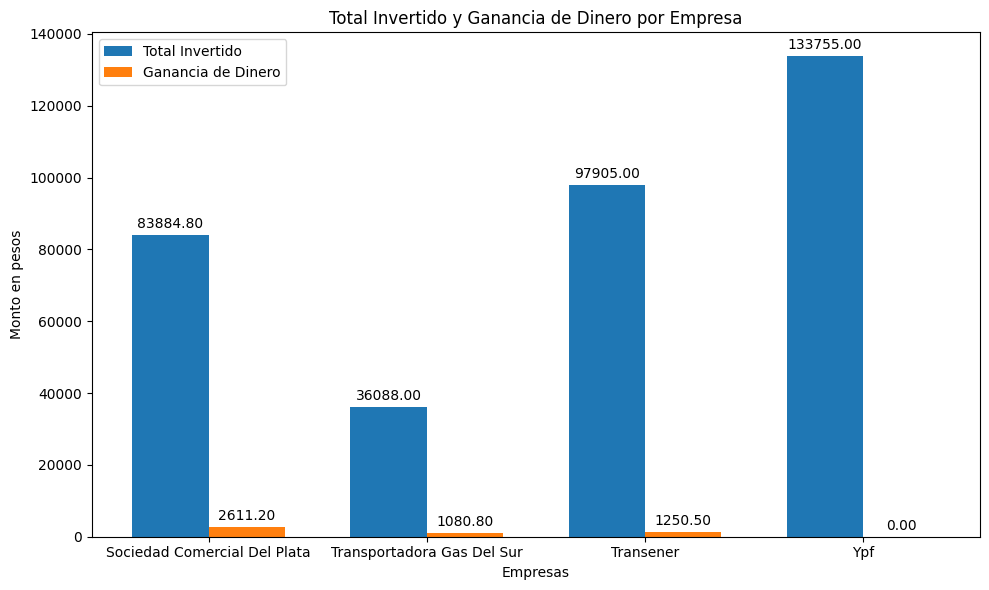

In [11]:
# Extraer los datos necesarios para los gráficos y asegurarse de que todos los valores sean no negativos
empresas = df_filtered['descripcion'].tolist()
cantidad = df_filtered['cantidad'].tolist()
total_invertido = (df_filtered['ppc'] * df_filtered['cantidad']).tolist()
ganancia_dinero = df_filtered['gananciaDinero'].clip(lower=0).tolist()  # Convertir valores negativos a 0
ratios_ganado_invertido = ((df_filtered['gananciaDinero'].clip(lower=0) / (df_filtered['ppc'] * df_filtered['cantidad'].clip(lower=1))) * 100).tolist()

# Función para crear gráficos de torta
def crear_grafico_torta(data, labels, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Crear gráficos de torta
crear_grafico_torta(cantidad, empresas, 'Cantidad de Acciones por Empresa')
crear_grafico_torta(total_invertido, empresas, 'Total Invertido por Empresa')
crear_grafico_torta(ganancia_dinero, empresas, 'Ganancia de Dinero por Empresa')
crear_grafico_torta(ratios_ganado_invertido, empresas, 'Ratio Ganado sobre Invertido por Empresa')

# Crear un gráfico de barras comparativo
x = np.arange(len(empresas))  # Etiquetas de las posiciones
width = 0.35  # El ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, total_invertido, width, label='Total Invertido')
rects2 = ax.bar(x + width/2, ganancia_dinero, width, label='Ganancia de Dinero')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Empresas')
ax.set_ylabel('Monto en pesos')
ax.set_title('Total Invertido y Ganancia de Dinero por Empresa')
ax.set_xticks(x)
ax.set_xticklabels(empresas)
ax.legend()

# Añadir etiquetas a las barras
def autolabel(rects):
    """Añadir etiquetas a las barras"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()